Ens'IA - Séance 3
Après avoir vu le fonctionnement d'un neurone et de la backpropagation, il est temps de passer aux choses sérieuses et de faire un réseau de neurones en ENTIER. Bien évidemment, on ne vous demande pas de tout reprogrammer depuis 0. Afin de faire notre réseau de neurones, nous allons utiliser une API du nom de [Keras](https://keras.io/). C'est une API qui permet de faire des réseaux de neurones de manière très simple et efficace.


In [1]:
import tensorflow as tf #on importe la libraire Keras
import numpy as np
import matplotlib.pyplot as plt

Afin d'entraîner un réseau de neurones, nous avons besoin de 3 jeux de données:

1.   1 **jeu d'entrainement** (80% des données totales)
2.   1 **jeu de validation** (~10%)
3.   1 **jeu de test**   (~10%)

 Le **jeu d'entrainement** vous servira à entrainer votre réseau de neurones.
 Le **jeu de validation** vous permettra de tester votre réseau de neurones pendant son entrainement afin de suivre sa progression.
 Le **jeu de test** vous servira à tester votre réseau de neurones après que l'entrainement soit terminé.

In [2]:
# Ici, on charge le jeu d'entrainement et de test
# Le jeu de validation devra être crée à partir du jeu de train (on pourra prendre 10% du jeu de train)
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Taille des jeux de données
print(x_train.shape) # le train possède 60000 images de taille 28*28
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


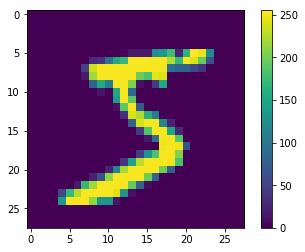

5


In [3]:
#Regardons une image
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()
#regardons une sortie
print(y_train[0])

Afin de créer notre jeu de données de validation, nous allons couper le jeu d'entrainement en 2. Pour faire cela, on va utiliser une fonction de la bibliothèque **sickit-learn** que nous avons déjà utilisée pendant la première séance. Allez chercher dans l'API le fonctionnement de la fonction train_test_split.


In [19]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, test_size=0.1) # 3 arguments à mettre

Vous souvenez-vous de l'entrée d'un réseaux de neurones ? Elle était sous forme d'un vecteur à 1 dimension. Il faut donc redimensionner toutes les images qui sont en (28,28) en images (786)

In [20]:
print(train_x.shape, val_x.shape)
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
print(train_x.shape, val_x.shape)

(54000, 28, 28) (6000, 28, 28)
(54000, 784) (6000, 784)


Et la sortie ? Elle devait être un vecteur à 1D représentant les classes (labels) sous forme d'un one hot encoding. On utilise donc la fonction to_categorical de keras pour transformer nos classes (0,1,2,...,9) en one hot encoding.

In [21]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=None, dtype='float32')
val_y = tf.keras.utils.to_categorical(val_y, num_classes=None, dtype='float32')

y_test_save = y_test.copy() #on garde ça pour la matrice de confusion à la fin du TP...
y_test = tf.keras.utils.to_categorical(y_test, num_classes=None, dtype='float32')

Nous avons désormais nos 3 jeux de données (train, val et test).
Nous allons pouvoir passer à la création du modèle.

Pour cela, nous allons créer un réseau de neurones qui prend en entrée nos images et en sortie nous donne le chiffre.
Il nous faudra donc avoir une entrée de taille égale au nombre de pixels dans une image. (28 par 28). 
La sortie devra être de taille égale à notre nombre de classes. (10 car on a 10 chiffres).
Vous y mettrez 3 couches:
*   Un couche **Dense avec 128 neurones** (qui prendra en entrée des matrices de taille (28*28,))
*   Une couche **Dense avec 64 neurones**
*   Une couche de sortie, **Dense également avec 10 neurones**



Vous mettrez **en fonction d'activation la fonction sigmoid pour chaque dense layer.**
model.summary() vous permet de voir plus en détail votre réseaux de neurones.

In [25]:
#créez ici le modèle
# voir https://keras.io/layers/core/ pour comment créer ces layers

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(784,)),
    tf.keras.layers.Activation('sigmoid'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('sigmoid'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('sigmoid'),
    ])
    
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

Vous avez au dessus crée un réseau de neurones. Il va maintenant falloir spécifier quelle loss et quelle méthode de backpropagation vous voulez utiliser.
Il en existe beaucoup mais pour le moment, nous allons simplement utiliser SGD (stockastic gradient descent), categorical crossentropy en loss et l'accuracy comme metrics.

In [26]:
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

Tout est désormais prêt pour commencer l'apprentissage ! Essayez d'entraîner votre modèle sur 10 epochs et avec un batch size de 64. Les plus courageux d'entre vous pourrons essayer de spécifier un learning rate. (les learning rates par défaut sont en général assez bons)

In [35]:
#il faudra 10 epochs et un batch_size de 64
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=10, batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 56us/sample - loss: 0.1645 - accuracy: 0.9514 - val_loss: 0.1618 - val_accuracy: 0.9507

Vous pouvez voir votre réseau de neurones progresser après chaque étape ! Vous voyez ainsi la loss, l'accuracy sur le jeu d'entrainement, la loss sur le jeu de validation et l'accuracy sur le jeu de validation. Le code suivant vous permet de tracer la courbe correspondant à l'accuracy et la loss au cours du temps. Il est toujours utile de les regarder pour voir comment évolue votre réseau de neurones.

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


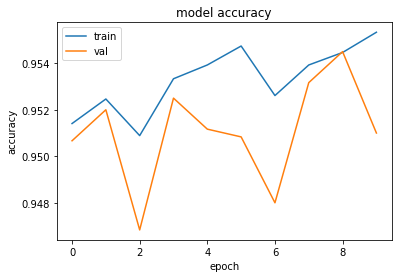

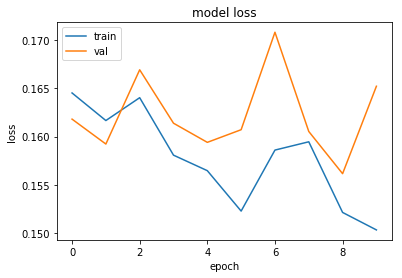

In [36]:
def plot_history(history):
    """
    plot l'accuracy et la loss
    """
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
plot_history(history)

Si vous voyez bien la loss diminuer et l'accuracy augmenter, normalement, c'est que tout est bon ! Il est désormais temps de tester votre réseau de neurones sur le jeu de test grâce à la méthode evaluate.

In [51]:
#evalue votre réseau de neurones sur le jeu de test résultat : [loss,accuracy]
model.evaluate(x_test, y_test)

res = model.predict(x_test) #on demande à notre réseau de neurones de prédire sur les entrées
print("Prédiction " + str(res[0])) #on regarde une prédiction.

# En fait une sortie est une array de taille 10 et chaque valeur correspond à la probabilité que l'image donnée soit de classe égale à l'indice de l'array
# Dans res[0], l'indice ayant la valeur la plus haute est l'indice 7. Donc la classe prédite est 7.
res = np.argmax(res,axis=1) # argmax nous donne l'indice ayant la valeur la plus haute (pour res[0], on a donc 7)

#regardons la matrice de confusion avec sklearn!
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_save, res, labels=[0,1,2,3,4,5,6,7,8,9]))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Pour aller plus loin
---

Votre réseau de neurones doit normalement très bien marcher mais en réalité, il possède quelques problèmes qui ne sont pas forcément apparus ici mais peuvent appraître en fonction de l'initialisation des weights et biases, du jeu de données, de l'architecture ou d'autres choses.

**Sur les fonctions d'activations**
Jusqu'à présent, chaque layer avait comme fonction d'activation la fonction sigmoid= 1 / (1+e^-x)
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

Or, il en existe d'autres qui marchent mieux. Le problème de sigmoid est que lorsque l'on effectue la descente de gradient, on va calculer les dérivées partielles afin de trouver vers où modifier les poids de nos neurones. Or, la dérivée de sigmoid pour des valeurs un peu trop grandes ou petites va être égale à 0... On se retrouve donc avec un gradient de 0 et notre réseau de neurones ne va plus s'entraîner. Le même problème se pose avec une autre fonction d'activation, tanh. Ce problème est connu sous le nom de "**vanishing gradient**".

Jusqu'à présent nous avons utilisé Sigmoid mais il en existe beaucoup qui marchent bien mieux que celle-ci.

La plus utilisée est **Relu** donc la fonction est Relu(x) = max(0,x)
La courbe est donc <img src=https://cdn-images-1.medium.com/max/1600/1*DfMRHwxY1gyyDmrIAd-gjQ.png width="500">

Pourquoi utilise t-on Relu?

1.   Peu chère à calculer
2.   Pas de vanishing gradient
3.   Elle est linéaire et converge plus rapidement

Une autre fonction très connue est **Softmax.** Elle est très souvent utilisée en tant que **dernière fonction** d'activation d'un réseau de neurones.
Il en existe plein dont certaines sont des dérivées de Relu. Il existe **Leaky Relu** ou **ELU** mais en pratique, Relu devrait vous suffire.

Si vous voulez vraiment approfondir vos connaissances sur les fonctions d'activations, regardez https://youtu.be/wEoyxE0GP2M (les 30 premières minutes)


**La descente de gradient**

![Texte alternatif…](https://blog.paperspace.com/content/images/2018/05/68747470733a2f2f707669676965722e6769746875622e696f2f6d656469612f696d672f70617274312f6772616469656e745f64657363656e742e676966.gif)

Voici ce qu'il se passe dans le cas d'une fonction en 3 dimensions. Bien évidemment, notre réseau de neurones ayant beaucoup plus de paramètres (parfois plusieurs centaines de milliers), la dimension est un peu plus élevée.
De plus, dans ce cas, on peut voir que tout se passe très bien, depuis le point de départ pris, on arrive bien à trouver le minimum de la fonction.
Or, ce n'est pas toujours le cas avec l'algorithme de descente de gradient. Il nous arrive souvent de trouver un minimum **LOCAL** alors que l'on cherche en réalite le minimum global de la fonction. C'est pourquoi d'autres algorithmes se sont développés. La première idée a été de rajouter à la descente de gradient un momentum. En d'autres mots, on rajoute de la vitesse à notre descente de gradient, ainsi, on trouve le minimum plus rapidement.

![Texte alternatif…](https://media.giphy.com/media/SJVFO3IcVC0M0/giphy.gif)

Voici comment différents algorithmes performent pour trouver le minimum d'une fonction. On peut bien voir que SGD (la descente de gradient de base) est la plus lente. **RMSProp** au contraire, marche plutôt bien.

Le plus utilisé d'entre eux est **Adam**. Une des caractéristiques d'Adam est qu'il y a un **learning rate par paramètre**. De plus, il est très simple à configurer (le plus souvent, les paramètres de base vous permettent directement d'avoir le meilleur résultat possible)

![Texte alternatif…](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png)

Voici une comparaison des différents optimizers les plus connus. On peut voir que Adam performe le mieux. Si vous voulez tout savoir sur Adam et que vous avez un peu de temps, [vous pouvez allez lire l'article ici](https://arxiv.org/pdf/1412.6980.pdf). Ou si vous avez besoin de plus d'explications, https://youtu.be/_JB0AO7QxSA (la première partie du cours est sur les optimizers)

**Le dropout**

Un problème qui peut arriver avec votre réseau de neurones actuel est qu'il souffre de "sur-entrainement" (overfitting). Autrement dit, votre réseau de neurones, au lieu de bien apprendre à généraliser sur des données qu'il n'a pas encore vues (le jeu de test), va apprendre les caractéristiques du jeu de train et va sous performer lors de la phase de test. Imaginez que l'on train un réseau de neurones à reconnaître des chats et que sur chacune des images du jeu d'entraînement, le réseau de neurones voit les oreilles, la queue et les pattes. Si dans le jeu de test il ne voit que les oreilles et les pattes, il risque de se tromper et ne pas identifier l'image en tant que chat.
Pour cela, on peut rajouter du "dropout". Autrement dit, entre 2 layers, on va "couper" certaines connections. Autrement dit, certains neurones de la couche k n'enverront pas leur sortie à la couche k+1.

In [0]:
# Et maintenant que vous avez vu tout ça, vous devriez pouvoir faire un réseau de neurones:
# avec pour chaque layer, la fonction d'activation relu sauf pour le dernier layer qui aura softmax.
# qui utilise adam et non SGD
# et qui a du dropout entre chaque layer.

model2 = keras.models.Sequential([
    # ici des couches!
])

model2.compile() #ici des paramètres

history = model2.fit() #et ici aussi

model2.evaluate(x_test,y_test) #votre score!